# Data Exploration Project with Seaborn

The project involves exploring the data from a restaurant, focusing specifically on tips, in order to identify patterns and formulate hypotheses. To achieve this, I imported the Seaborn library to assist in data visualization. However, I also had to perform the following steps:

* Uploaded the dataset directly to Google Colab and imported Pandas for data preparation, as its usage is more intuitive in the context of Seaborn;

* Since the records were in English, I had to translate all the entries used in the analysis;

* Finally, I conducted the exploration itself, focusing on tips and comparing them with the bill amount, dessert choice, day of the week, and time of day. Additionally, I performed hypothesis testing using the RankSums library to compare the distribution of the data.

# Setting Up the Environment

In [ ]:
import pandas as pd

In [ ]:
pd.read_csv('tips.csv')

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [ ]:
data = pd.read_csv('tips.csv')

# Exploratory Analysis

### Analysis 1 - Bill Amount and Tip

In [ ]:
import seaborn as sns

In [ ]:
data.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [ ]:
rename = {
    'total_bill': 'bill_amount',
    'dessert': 'dessert',
    'day': 'day_of_week',
    'time': 'time_of_day',
    'size': 'total_people'
}

In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
tip = data.rename(columns = rename)

In [ ]:
tip.head(1)

,bill_amount,tip,dessert,day_of_week,time_of_day,total_people
0,16.99,1.01,No,Sun,Dinner,2


In [ ]:
tip.columns

Index(['bill_amount', 'tip', 'dessert', 'day_of_week', 'time_of_day',
       'total_people'],
      dtype='object')

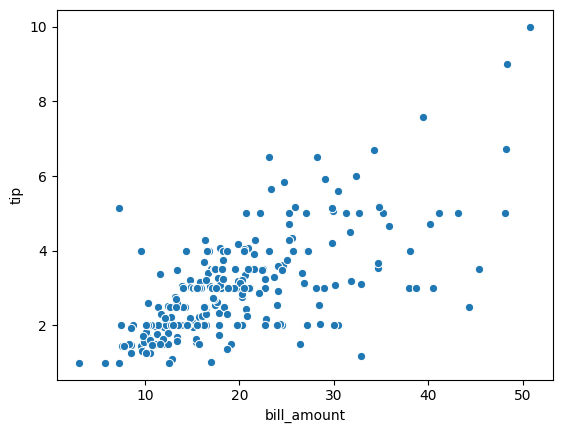

In [ ]:
tip_value = sns.scatterplot(x='bill_amount', y='tip', data=tip)

Visually, the tip amount increases as the bill amount increases.

In [ ]:
print('The database contains {} register \n'.format(tip.shape[0]))
print('Non-null register')
tip.count()

The database contains 244 register 

Non-null register


bill_amount     244
tip             244
dessert         244
day_of_week     244
time_of_day     244
total_people    244
dtype: int64

In [ ]:
tip.head(1)

,bill_amount,tip,dessert,day_of_week,time_of_day,total_people
0,16.99,1.01,No,Sun,Dinner,2


In [ ]:
tip['percentage'] = tip['tip'] / tip['bill_amount']

In [ ]:
tip.head()

,bill_amount,tip,dessert,day_of_week,time_of_day,total_people,percentage
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808


In [ ]:
tip.percentage = tip.percentage.round(2)

In [ ]:
tip.head()

,bill_amount,tip,dessert,day_of_week,time_of_day,total_people,percentage
0,16.99,1.01,No,Sun,Dinner,2,0.06
1,10.34,1.66,No,Sun,Dinner,3,0.16
2,21.01,3.50,No,Sun,Dinner,3,0.17
3,23.68,3.31,No,Sun,Dinner,2,0.14
4,24.59,3.61,No,Sun,Dinner,4,0.15


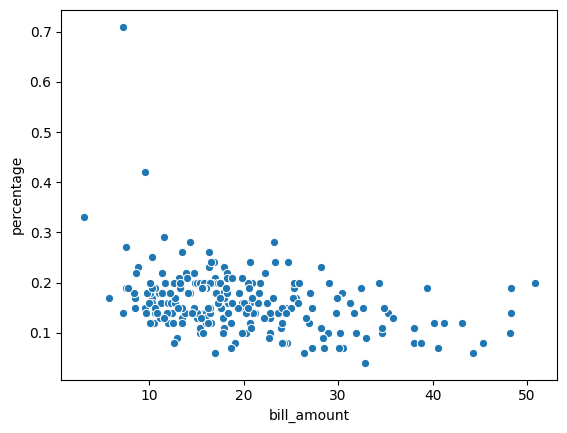

In [ ]:
bill_percentage = sns.scatterplot(x='bill_amount', y='percentage', data=tip )

Visually, the bill amount is not proportional to the percentage of tips, as there is a decrease in the data as the bill amount increases, resulting in a lower percentage.

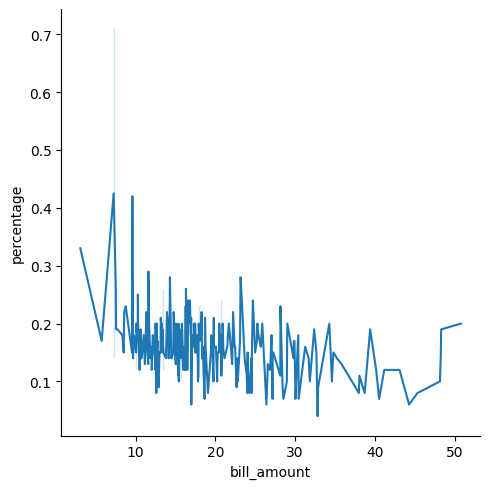

In [ ]:
bill_percentage_line = sns.relplot(x='bill_amount', y='percentage', kind='line', data=tip)

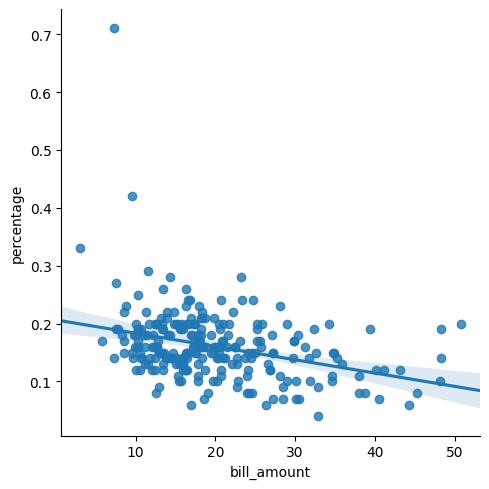

In [ ]:
sns.lmplot(x='bill_amount', y='percentage', data=tip)

### Analysis 2 - Dessert

In [ ]:
tip.head()

,bill_amount,tip,dessert,day_of_week,time_of_day,total_people,percentage
0,16.99,1.01,No,Sun,Dinner,2,0.06
1,10.34,1.66,No,Sun,Dinner,3,0.16
2,21.01,3.50,No,Sun,Dinner,3,0.17
3,23.68,3.31,No,Sun,Dinner,2,0.14
4,24.59,3.61,No,Sun,Dinner,4,0.15


In [ ]:
tip[tip.dessert=='Yes'].describe()                                              # Summary of results considering dessert data included in the bill

,bill_amount,tip,total_people,percentage
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [ ]:
tip[tip.dessert=='No'].describe()                                               # Summary of results considering dessert data not included in the bill

,bill_amount,tip,total_people,percentage
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


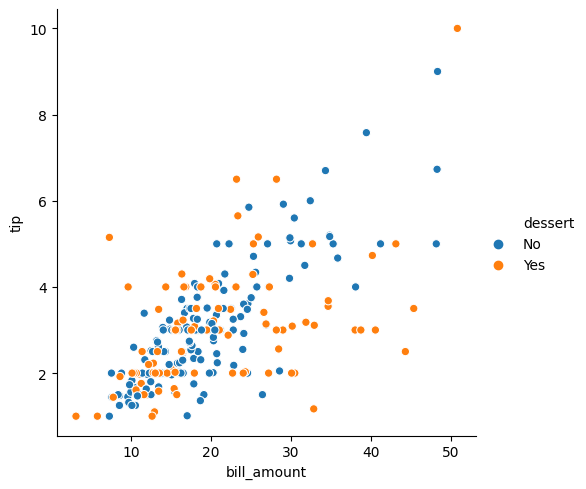

In [ ]:
sns.relplot(x='bill_amount', y='tip', hue='dessert', data=tip)

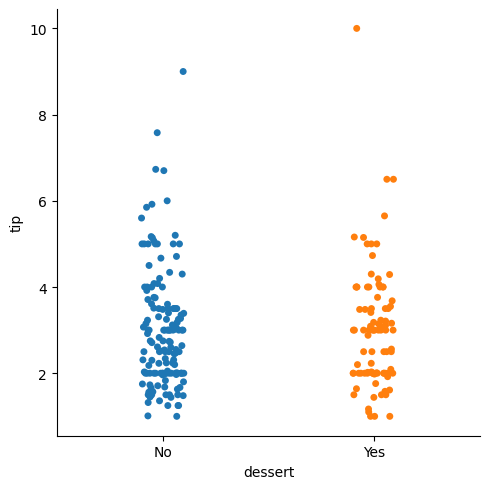

In [ ]:
sns.catplot(x='dessert', y='tip', data=tip)

Visually, there is little difference between those who ordered dessert and those who did not.

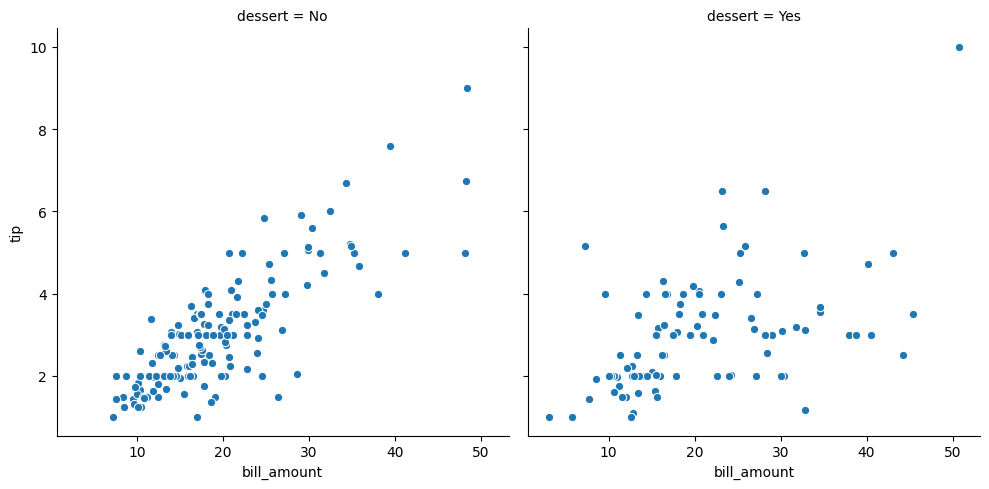

In [ ]:
sns.relplot(x='bill_amount', y='tip', col='dessert', data=tip)

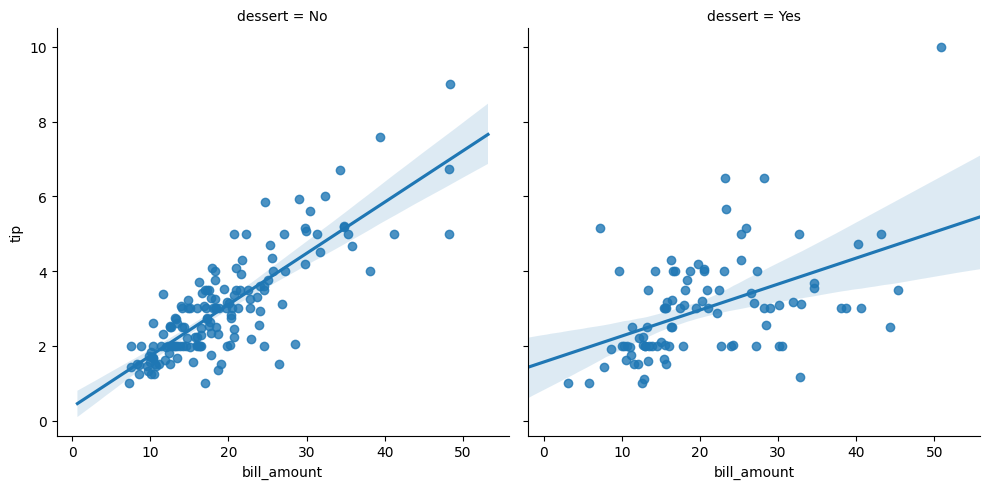

In [ ]:
sns.lmplot(x='bill_amount', y='tip', col='dessert', data=tip)

Test of Hypothesis

H<sup>null</sup>

The distribution of the tip rate is the same in both groups.

H<sup>alt</sup>

The distribution of the tip rate is not the same in both groups.

In [ ]:
from scipy.stats import ranksums

In [ ]:
dessert = tip.query("dessert == 'Yes'").percentage

In [ ]:
no_dessert = tip.query("dessert == 'No'").percentage

In [ ]:
ranksums(dessert, no_dessert)

RanksumsResult(statistic=-0.6331073145314825, pvalue=0.5266635660124415)

In [ ]:
r = ranksums(dessert, no_dessert)

In [ ]:
print('The value of p-value is {}'.format(r.pvalue))

The value of p-value is 0.5266635660124415



H<sub>null</sub>

The distribution of the tip rate is the same in both groups.

The p-value represents the probability of that sample having occurred within the population. If the chance is low, typically with a p-value < 0.05, it signifies that a very rare event has occurred. In such cases, we choose to reject the null hypothesis and state that it may not be true.

### Analysis 3 - Day of the Week

In [ ]:
tip.head()

,bill_amount,tip,dessert,day_of_week,time_of_day,total_people,percentage
0,16.99,1.01,No,Sun,Dinner,2,0.06
1,10.34,1.66,No,Sun,Dinner,3,0.16
2,21.01,3.50,No,Sun,Dinner,3,0.17
3,23.68,3.31,No,Sun,Dinner,2,0.14
4,24.59,3.61,No,Sun,Dinner,4,0.15


In [ ]:
tip.day_of_week.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

Analyzing the bill amount by day of the week.

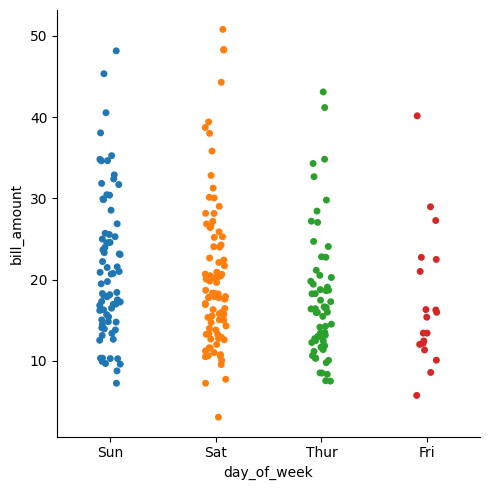

In [ ]:
sns.catplot(x='day_of_week',y='bill_amount', data=tip)

Analyzing tips by day of the week.

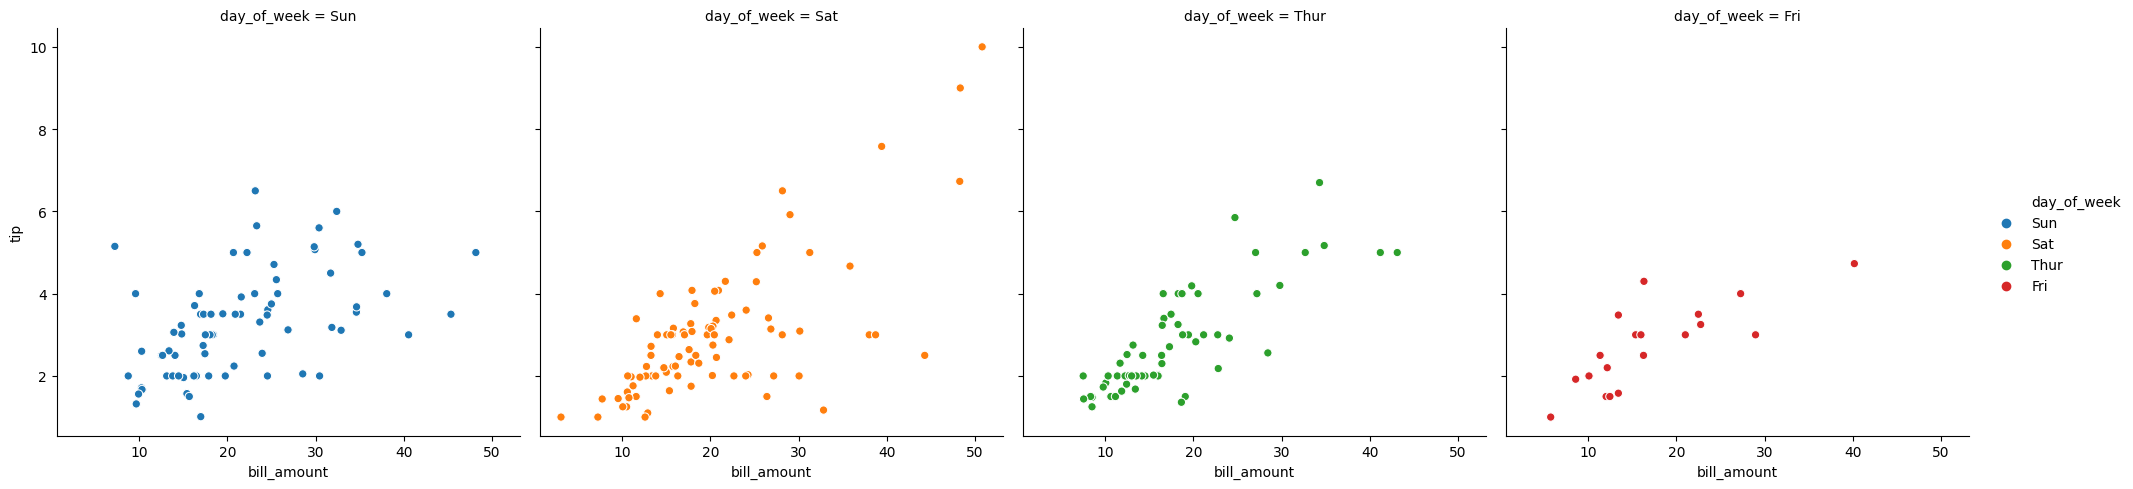

In [ ]:
sns.relplot(x='bill_amount', y='tip', hue='day_of_week', col='day_of_week', data=tip)

Analyzing the percentage by day of the week.

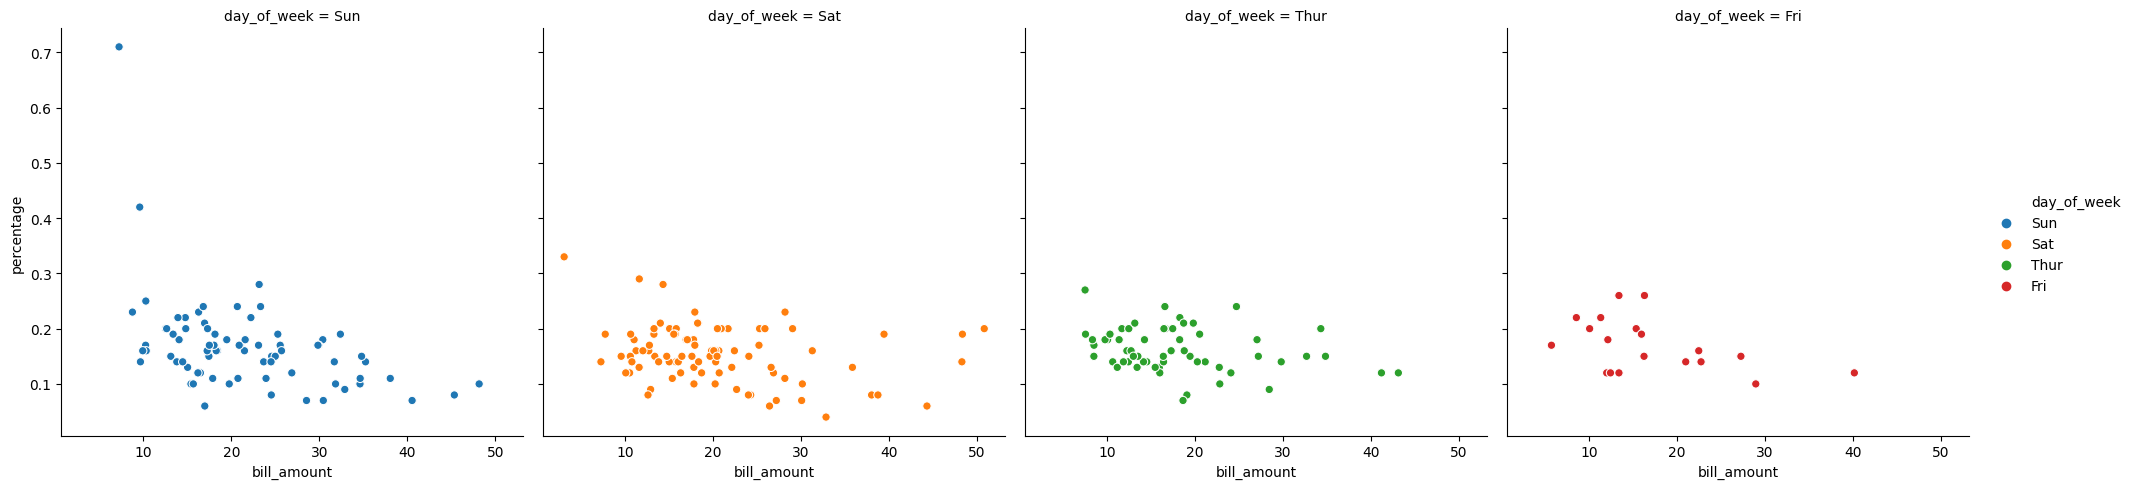

In [ ]:
sns.relplot(x='bill_amount', y='percentage', hue='day_of_week', col='day_of_week', data=tip)

Analyzing the percentage by day of the week with mean line.

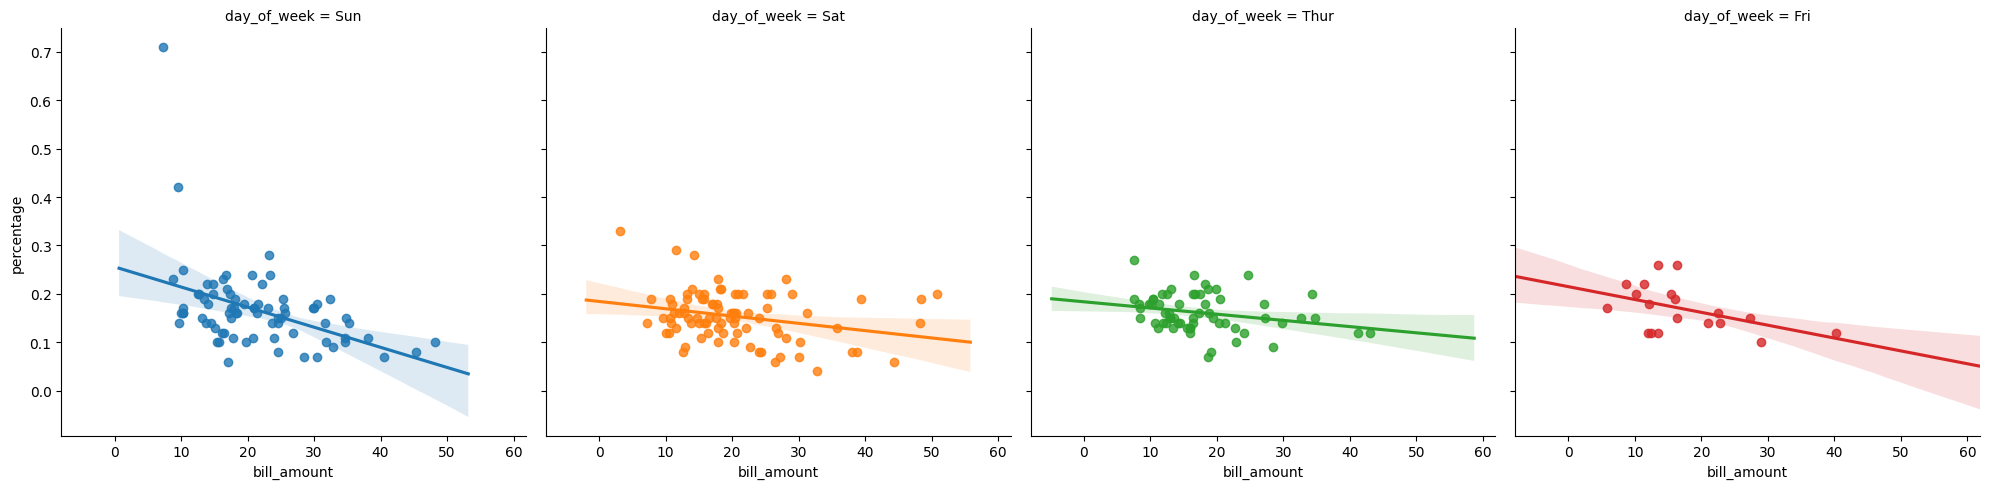

In [ ]:
sns.lmplot(x='bill_amount', y='percentage', hue='day_of_week', col='day_of_week', data=tip)

Overall Average

In [ ]:
tip_total_mean = tip.tip.mean()

In [ ]:
print('The total mean of tips is {}'.format(tip_total_mean))

The total mean of tips is 2.99827868852459


In [ ]:
tip.groupby(['day_of_week']).mean()[['bill_amount', 'tip', 'percentage']]

<ipython-input-61-831968a920d7>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tip.groupby(['day_of_week']).mean()[['bill_amount', 'tip', 'percentage']]


,bill_amount,tip,percentage
day_of_week,,,
Fri,17.151579,2.734737,0.169474
Sat,20.441379,2.993103,0.153678
Sun,21.410000,3.255132,0.166974
Thur,17.682742,2.771452,0.161129


In [ ]:
print('Frequency os days')
tip.day_of_week.value_counts()

Frequency os days


Sat     87
Sun     76
Thur    62
Fri     19
Name: day_of_week, dtype: int64

Hypothesis Test

**H<sub>null</sub>**

> The distribution of the bill amount is the same on Saturday and Sunday.

**H<sub>alt</sub>**

> The distribution of the bill amount is not the same on Saturday and Sunday.

In [ ]:
bill_amount_sunday = tip.query("day_of_week == 'Sun'").bill_amount

In [ ]:
bill_amount_saturday = tip.query("day_of_week == 'Sat'").bill_amount

In [ ]:
r2 = ranksums(bill_amount_sunday, bill_amount_saturday)
print('The value of p-value is {}'.format(r2.pvalue))

The value of p-value is 0.3576728477868443


**H<sub>null</sub>**

> **The distribution of the bill amount is the same on Saturday and Sunday.**

### Analysis 4 - Time of Day

In [ ]:
tip.head()

,bill_amount,tip,dessert,day_of_week,time_of_day,total_people,percentage
0,16.99,1.01,No,Sun,Dinner,2,0.06
1,10.34,1.66,No,Sun,Dinner,3,0.16
2,21.01,3.50,No,Sun,Dinner,3,0.17
3,23.68,3.31,No,Sun,Dinner,2,0.14
4,24.59,3.61,No,Sun,Dinner,4,0.15


In [ ]:
tip.time_of_day.unique()

array(['Dinner', 'Lunch'], dtype=object)

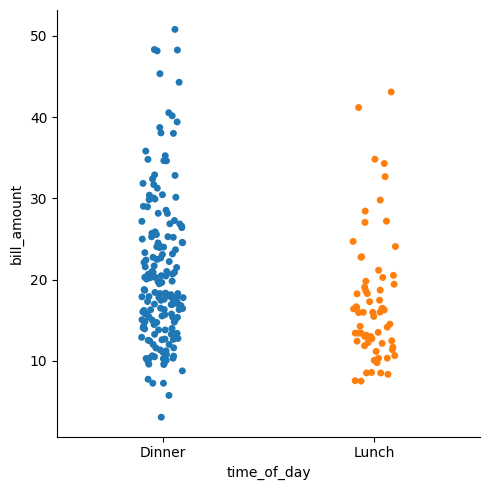

In [ ]:
sns.catplot(x='time_of_day', y='bill_amount', data=tip)

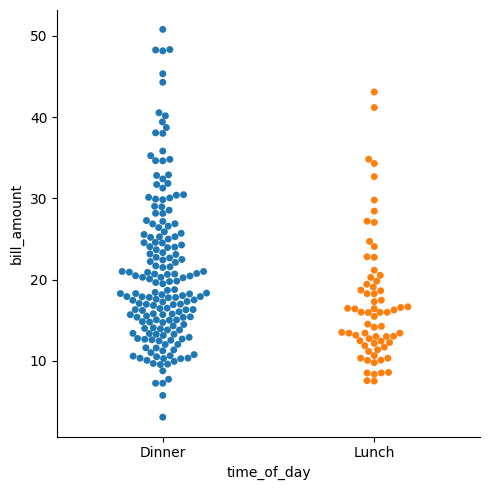

In [ ]:
sns.catplot(x='time_of_day', y='bill_amount', kind='swarm',data=tip)

<Axes: xlabel='time_of_day', ylabel='bill_amount'>

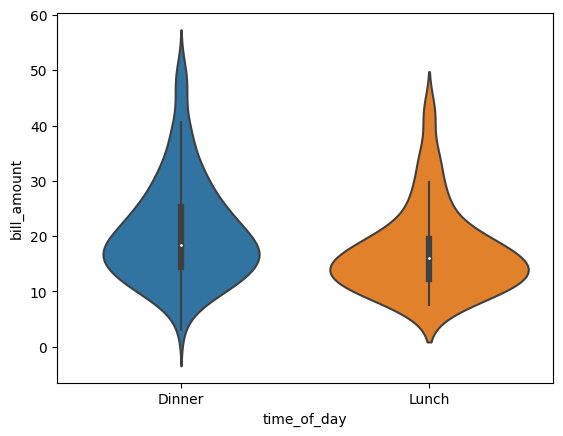

In [ ]:
sns.violinplot(x='time_of_day', y='bill_amount', data=tip)

<Axes: xlabel='time_of_day', ylabel='bill_amount'>

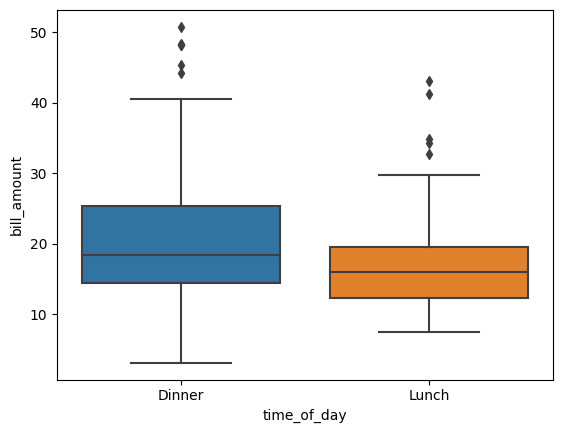

In [ ]:
sns.boxplot(x='time_of_day', y='bill_amount', data=tip)

In [ ]:
lunch = tip.query("time_of_day == 'Lunch'").bill_amount

<Axes: xlabel='bill_amount'>

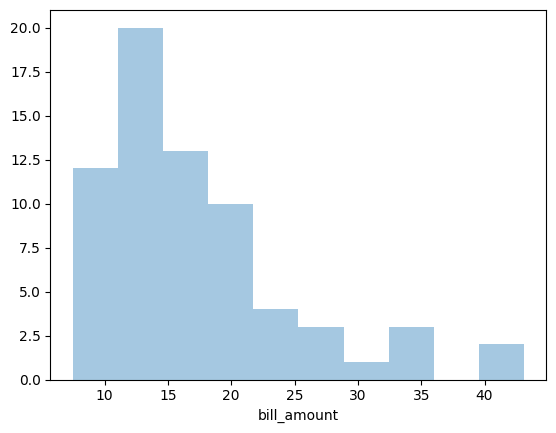

In [ ]:
sns.distplot(lunch, kde=False)

In [ ]:
dinner = tip.query("time_of_day == 'Dinner'").bill_amount

<Axes: xlabel='bill_amount'>

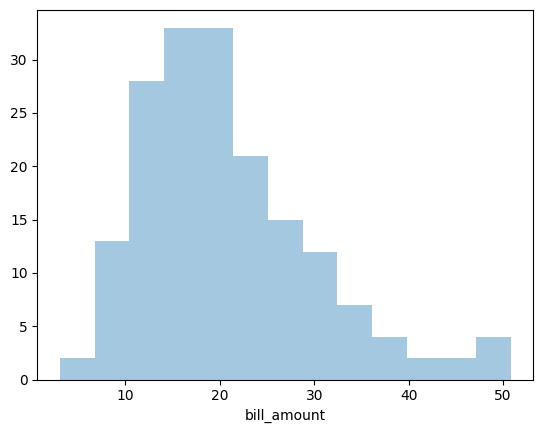

In [ ]:
sns.distplot(dinner, kde=False)

In [ ]:
tip.groupby(['time_of_day']).mean()[['bill_amount', 'tip', 'percentage']]

<ipython-input-77-432dfad5ad56>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tip.groupby(['time_of_day']).mean()[['bill_amount', 'tip', 'percentage']]


,bill_amount,tip,percentage
time_of_day,,,
Dinner,20.797159,3.102670,0.159773
Lunch,17.168676,2.728088,0.163971


Test of Hypothesis 1

**H<sub>null</sub>**
> **The distribution of the bill amount is the same for dinner and lunch.**

**H<sub>alt</sub>**
> **The distribution of the bill amount is not the same for dinner and lunch.**

In [ ]:
r2 = ranksums(dinner, lunch)

In [ ]:
print('The value of p-value is {}'.format(r2.pvalue))

The value of p-value is 0.0011791039723641672


**H<sub>alt</sub>**
> **The distribution of the bill amount is not the same for dinner and lunch.**

Test of Hypothesis 2

**H<sub>null</sub>**
> **The distribution of the tip rate is the same for dinner and lunch.**

**H<sub>alt</sub>**
> **The distribution of the tip rate is not the same for dinner and lunch.**

In [ ]:
lunch_percentage = tip.query("time_of_day == 'Lunch'").percentage

In [ ]:
dinner_percentage = tip.query("time_of_day == 'Dinner'").percentage

In [ ]:
r3 = ranksums(lunch_percentage, dinner_percentage)

In [ ]:
print('The value of p-value is {}'.format(r3.pvalue))

The value of p-value is 0.2602493995587126


**H<sub>null</sub>**
> **The distribution of the tip rate is the same for dinner and lunch.**